# Making Economist Style Plots in Matplotlib

If you like data visualization, chances are you've see charts from [The Economist](https://www.economist.com/), either on their website or in their magazine. For decades they have been known for simple and effective visualizations that convey useful information in a simple way. For the past few years, I've been constantly inspired by their visualizations. Whether I see them on my Kindle, on the web, or a mobile device, they are always compelling, and they get the point across. This is something all data scientists should aspire to in their own visualizations.

In October 2018, the Economist launched a dedicated blog for their data visualizations called [Graphic Detail](https://www.economist.com/graphic-detail). If you scroll through their posts you can see that their style remains consistent between chart types. This isn't because they are a factory making visualizations as fast as they can. Instead, this consistent style is designed to simplify their visualizations and provide the key information to the reader as quickly as possible. 

As a Python focused data scientist, in my daily work I almost exclusively use [Matplotlib](https://matplotlib.org/) for my data visualizations. I like it because it is incredibly customizable. Every element is under your control. While I'm sure there are data journalists at the Economist using Matplotlib for exploration work or mockups (or ggplot for R), I highly doubt they make their production visualizations using only Matplotlib. 

However, I'm a big fan of keeping as much of my workflow in one place. This thinking inspired me to re-create several of the Economists' chart types in 100% Python and Matplotlib. I have two goals for this project. First, I want to give examples of how to execute great design for charts in Matplotlib. Second, I want to show that a programmatic plotting library can be used to create production plots. 

Please note that I won't be making re-usable functions or a libary for this. Instead, if you are interested, I hope you can copy any code you may want and re-use it yourself.

I will be recreating three common plot types the Economist uses regularly: bar charts, line charts, and dumbbell charts. But before we get to that, let's break down the key elements of the Economists' visualizations.

> *Please note that this is being done for educational and informational purposes only.*



## The Economist's Style

To get an understanding of the Economist's visualization style, we can use their very own visual style guide from 2017. Here is the [link](https://design-system.economist.com/documents/CHARTstyleguide_20170505.pdf). Let's break down the common elements of the Economist's style. 

### Title and Subtitle
Charts usually have both a title and subtitle. The title will often be a play on words, like "Unhappy meal" for rising food prices. The subtitle will be a simple statement of what the chart contains. Always located on the top left, they sit flush with the left edge of the chart content. The title is always bold and larger than the subtitle.

### Gridlines
Only horizontal gridlines are shown. Minor gridlines aren't shown at all. Gridlines are spaced in a way that is logical for the data and easy to understand. 

### Axes and Tick lables
Only the horizontal axis is shown. No other bounding box around the chart data besides this. On the x-axis ticks (the little lines next to the label) are only shown when they are needed to show which data connect to which tick label. On the y-axis there are no ticks, only the major gridlines. The y-axis tick labels sit on top of the major gridlines inside the chart area. 

The exception to this is a horizontal bar chart. In this case the y-axis is shown but and there is no x-axis. Y-axis tick labels sit directly on top of the number.

### Colors
The Economist uses two chart palletes, one for the web and one for print. We will focus on the web one. The main color "Econ Red" (#E3120B) is used for the top line and tag box. The grey (#758D99) in the style guide seems to be used for the gridlines. The colors for plotting are:

- Red, #DB444B
- Blue, #006BA2
- Cyan, #3EBCD2
- Green, #379A8B
- Yello, #EBB434
- Olive, #B4BA39
- Purple, #9A607F
- Gold, #D1B07C

There are more color pallettes in the style guide for different uses, but this is the main color pallette. The color order for each chart type is different, and I will attempt to reproduce that below. All plots will use the web style with a white background.


### Other Stylistic Points
A horizontal line in "Economist red" runs along the entire top of the chart. A horizontal rectangle, which they call a tag, sits at the top left corner. Data sources are given at the bottom left in 75% opacity.

We can go over chart specific styles in the sections below.



## Bar Chart

Let's build a bar chart in the style of the Economist! Here is an [example of a bar chart from the Economist](https://www.economist.com/graphic-detail/2021/11/09/the-gender-gap-in-academic-research-widened-during-first-wave-of-the-pandemic). We will use 2020 GDP values by country from a Kaggle dataset ([link](https://www.kaggle.com/holoong9291/gdp-of-all-countries19602020/version/3)). Our purpose of the chart is to show the top 5 countries by GDP value.

The Economist typically only uses a vertical bar chart where the one or two categorical variables are being compared over time. For the data we are working on, a horizontal bar chart would be more appropriate. This is because the country names are longer, and they wouldn't fit easily on the x-axis without being rotated. This would make them harder to read. The solution is to push the data over some and have the labels on the y-axis.

Let's import `pandas` and `matplotlib` and read in our data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This makes out plots higher resolution, which makes them easier to see while building
plt.rcParams['figure.dpi'] = 100

In [ ]:
gdp = pd.read_csv('data/gdp_1960_2020.csv')
gdp.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


The GDP numbers here are very long. To make them easier to read we can divide the GDP number by 1 trillion. 

In [ ]:
gdp['gdp_trillions'] = gdp['gdp'] / 1_000_000_000_000

Now we can filter for only 2020 and grab the bottom 9. We do this instead of sorting by descending because Matplotlib plots from the bottom to top, so we actually want our data in reverse order.

In [ ]:
gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions').tail(9)

,year,rank,country,state,gdp,gdp_percent,gdp_trillions
9967,2020,9,South Korea,Asia,1630525005469,0.021028,1.630525
9966,2020,8,Canada,America,1643407977068,0.021194,1.643408
9965,2020,7,Italy,Europe,1886445268340,0.024328,1.886445
9964,2020,6,France,Europe,2603004395901,0.033569,2.603004
9963,2020,5,India,Asia,2622983732006,0.033827,2.622984
9962,2020,4,United Kingdom,Europe,2707743777173,0.034920,2.707744
9961,2020,3,Germany,Europe,3806060140124,0.049084,3.806060
9960,2020,2,China,Asia,14722730697890,0.189870,14.722731
9959,2020,1,the United States,America,20936600000000,0.270006,20.936600


Now we can build our chart. The code is here with comments. 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


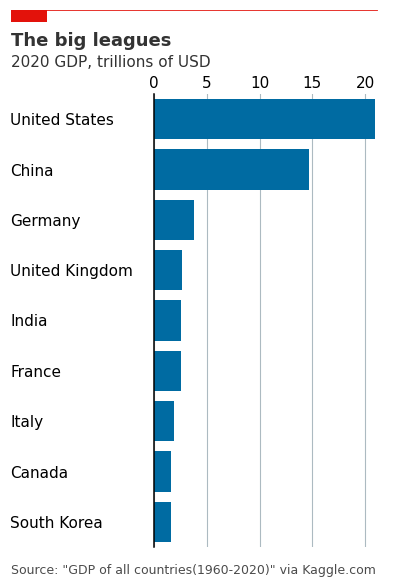

In [ ]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(3,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Setup data
gdp['country'] = gdp['country'].replace('the United States', 'United States')
gdp_bar = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]

# Plot data
ax.barh(gdp_bar['country'], gdp_bar['gdp_trillions'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xticklabels([0, 5, 10, 15, 20])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_bar['country'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 8.5)

# Add in line and tag
ax.plot([-.35, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="The big leagues", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="2020 GDP, trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/economist_bar.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white


Wow that's a lot of code! There is a lot there, and it's worth taking the time to go line by line and understand it with the comments. 

Now let's move on to the line chart.

## Line Chart

Line charts are perhaps the most iconic chart from the Economist. Here is an [example of a line chart from the Economist](https://www.economist.com/graphic-detail/2021/10/18/is-a-winter-wave-of-coronavirus-infections-looming). 

We will use the same data GDP data as above to create a time series plot of the top 9 countries by GDP. To highlight the path China has taken we will only show the US and China with standout color, and the other 7 as grey.

First we can get the names of the countries we want to filter from our previous code. 

In [ ]:
countries = gdp[gdp['year'] == 2020].sort_values(by='gdp_trillions')[-9:]['country'].values
countries

array(['South Korea', 'Canada', 'Italy', 'France', 'India',
       'United Kingdom', 'Germany', 'China', 'United States'],
      dtype=object)

Matplotlib does a good job with datetimes for time series, so we can convert the date column to a Pandas datetime Series.

In [ ]:
gdp['date'] = pd.to_datetime(gdp['year'], format='%Y')

Our data is now ready, let's get to plotting!

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator


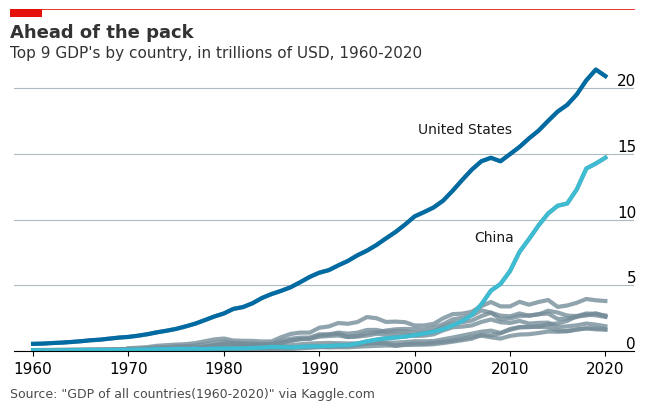

In [ ]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(8,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Plot data
# Loop through country names and plot each one.
for country in countries:
    ax.plot(gdp[gdp['country'] == country]['date'], 
            gdp[gdp['country'] == country]['gdp_trillions'], 
            color='#758D99', 
            alpha=0.8, 
            linewidth=3)

# Plot US and China separately
ax.plot(gdp[gdp['country'] == 'United States']['date'], 
        gdp[gdp['country'] == 'United States']['gdp_trillions'], 
        color='#006BA2',
        linewidth=3)

ax.plot(gdp[gdp['country'] == 'China']['date'], 
        gdp[gdp['country'] == 'China']['gdp_trillions'], 
        color='#3EBCD2',
        linewidth=3)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','left']].set_visible(False)

# Shrink y-lim to make plot a bit tigheter
ax.set_ylim(0, 23)

# Set xlim to fit data without going over plot area
ax.set_xlim(pd.datetime(1958, 1, 1), pd.datetime(2023, 1, 1))

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labelsize=11)        # Set tick label size

# Reformat y-axis tick labels
ax.set_yticklabels(np.arange(0,25,5),            # Set labels again
                   ha = 'right',                 # Set horizontal alignment to right
                   verticalalignment='bottom')   # Set vertical alignment to make labels on top of gridline      

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11)       # Set tick label size

# Add labels for USA and China
ax.text(x=.63, y=.67, s='United States', transform=fig.transFigure, size=10, alpha=.9)
ax.text(x=.7, y=.4, s='China', transform=fig.transFigure, size=10, alpha=.9)


# Add in line and tag
ax.plot([0.12, .9],                  # Set width of line
        [.98, .98],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.91, s="Ahead of the pack", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Top 9 GDP's by country, in trillions of USD, 1960-2020", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=0.01, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/economist_line.png',    # Set path and filename
            dpi = 300,                     # Set dots per inch
            bbox_inches="tight",           # Remove extra whitespace around plot
            facecolor='white')             # Set background color to white


Even more code this time. Typically Economist charts are more square, espcially for their print edition. I decided to make it wider to fit better in an article by itself. 

## Dumbbell Chart

For the last chart, we will make a dumbbell chart. These charts are used to show the differences in a categorical variable, usually over time. Here is an [example of a dumbbell chart from the Economist](https://www.economist.com/graphic-detail/2021/11/12/vaccines-are-finally-arriving-in-africa-but-the-rollout-will-be-a-challenge).

We will again use the GDP data. This time to show the difference in GDP from 1960 to 2020 for the top 9 countries. 

In [ ]:
gdp_dumbbell = gdp[(gdp['country'].isin(countries)) & ((gdp['year'] == 1960) | (gdp['year'] == 2020))].sort_values(by='gdp')
gdp_dumbbell.head(5)

,year,rank,country,state,gdp,gdp_percent,gdp_trillions,date
31,1960,32,South Korea,Asia,3958190758,0.003413,0.003958,1960-01-01
7,1960,8,India,Asia,37029883875,0.031931,0.037030,1960-01-01
6,1960,7,Italy,Europe,40385288344,0.034824,0.040385,1960-01-01
5,1960,6,Canada,America,40461721692,0.034890,0.040462,1960-01-01
3,1960,4,China,Asia,59716467625,0.051493,0.059716,1960-01-01


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


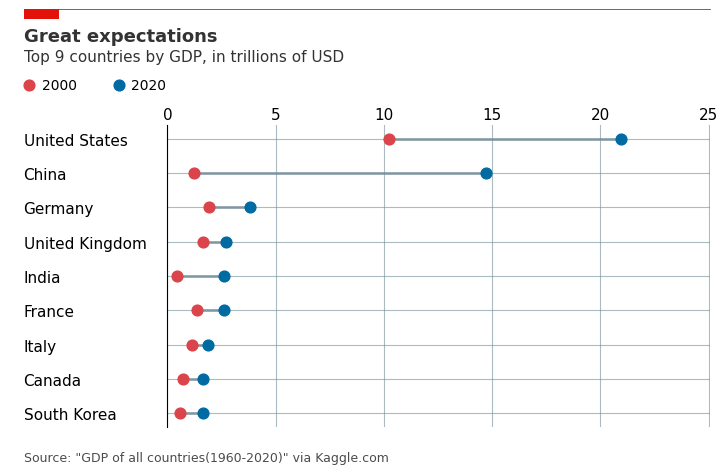

In [ ]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(7,4))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Setup data
gdp_dumbbell = (gdp[(gdp['country'].isin(countries)) & ((gdp['year'] == 2000) | (gdp['year'] == 2020))][['year','gdp_trillions','country']]
                .pivot(index='country',columns='year', values='gdp_trillions')
                .sort_values(by=2020))

# Plot data
# Plot horizontal lines first
ax.hlines(y=gdp_dumbbell.index, xmin=gdp_dumbbell[2000], xmax=gdp_dumbbell[2020], color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)
# Plot bubbles next
ax.scatter(gdp_dumbbell[2000], gdp_dumbbell.index, label='1960', s=60, color='#DB444B', zorder=3)
ax.scatter(gdp_dumbbell[2020], gdp_dumbbell.index, label='2020', s=60, color='#006BA2', zorder=3)

# Set xlim
ax.set_xlim(0, 25.05)

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(gdp_dumbbell.index,       # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Set Legend
ax.legend(['2000', '2020'], loc=(-.29,1.09), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)

# Add in line and tag
ax.plot([-0.08, .9],                 # Set width of line
        [1.17, 1.17],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-0.08,1.17),               # Set location of rectangle by lower left corder
                           0.05,                       # Width of rectangle
                           -0.025,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-0.08, y=1.09, s="Great expectations", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.08, y=1.04, s="Top 9 countries by GDP, in trillions of USD", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.08, y=0.04, s="""Source: "GDP of all countries(1960-2020)" via Kaggle.com""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('images/economist_dumbbell.png',    # Set path and filename
            dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')                  # Set background color to white

Dumbbell charts aren't as common on the Economist, but they are a great way to show a change in data over time. 

## Conclusion

While we have seen that it is possible to recreate the chart style of the Economist in Matplotlib, it certainly isn't easy. For each plot tens of lines of code are required, and each plot took several iterations of trial and error to get the way you see above.

As you can see in the code, the plotting of the data in Matplotlib is fairly straightforward. However, aligning the text, line, and tag required very specific custom locations to be manually entered. This is one thing that would be good to improve upon in the code above. 

This was a great experience, and I learned several things about Matplotlib in the process. The library continues to amaze me with its ability to be customized. Perhaps in the future I will build a more reproducible method for creating print quality charts in Matplotlib.

### Source: 

[Making Economist-Style Plots in Matplotlib by Robert Ritz](https://towardsdatascience.com/making-economist-style-plots-in-matplotlib-e7de6d679739)